In [103]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")
from scipy.io import loadmat

# Part 1.1) Load the data

In [104]:
data = loadmat('ex7data2.mat')
data.keys()
X = data['X']

In [105]:
X.shape

(300, 2)

In [106]:
K = 3; #3 centroids
initial_centroid = np.array([[3,3],[6,2],[8,5]])

# Part 1.2) Find the closest centroid to each data sample

In [30]:
def findClosestCentroid(X,centroid):
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroid.shape[0],1))
    for i in range(len(X)):
        #Compute distance of the point from each centroid
        for j in range(len(centroid)):
            dist = X[i] - centroid[j]
            length = np.sum(np.square(dist))
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx
                
            

In [31]:
idx_closest = findClosestCentroid(X,initial_centroid)

In [33]:
idx_closest.shape

(300, 1)

# Part 1.3) Find new centroids by computing the means of the samples assigned to each previous centroid

In [52]:
def computeCentroid(X, idx,K):
    #go through all the data points
    #when the index is equal to the first centroid add the point to it
    #once the looping is done, divide the centroid by the count
    m = X.shape[0]
    new_centroid = np.zeros((K,X.shape[1]))
    count = np.zeros((K,1))
    for i in range(m):
        #get the centroid number for this datapoint
        index = int(idx[i])-1
        new_centroid[index] += (X[i])
        count[index] += 1
    return new_centroid/count
        

In [53]:
new_centroid = computeCentroid(X,idx_closest,3)

In [109]:
new_centroid

array([[0.00113324, 0.00098346, 0.00081724],
       [0.00370974, 0.00330831, 0.00242145],
       [0.00303754, 0.00255719, 0.00198806]])

In [111]:
def plotKMeans(X, centroids, idx, K, num_iters):
    
    m,n = X.shape[0], X.shape[1]
    fig, ax = plt.subplots(nrows= num_iters, ncols=1, figsize = (6,36))
    #lets plot data for every centroid first
    for i in range(num_iters):
        #visualize the data
        color = 'rgb'
        for k in range(1,K+1):
            #get the boolean mask where idx is equal to i
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
        ax[i].scatter(centroids[:,0],centroids[:,1], s = 120, color = "black",marker = "x", linewidth = 3)
        title = "Iteration number" +str(i)
        ax[i].set_title(title)
        
        centroids = computeCentroid(K=K,X=X,idx=idx)
        idx = findClosestCentroid(X=X,centroid=centroids)
    
    plt.tight_layout()
    return centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

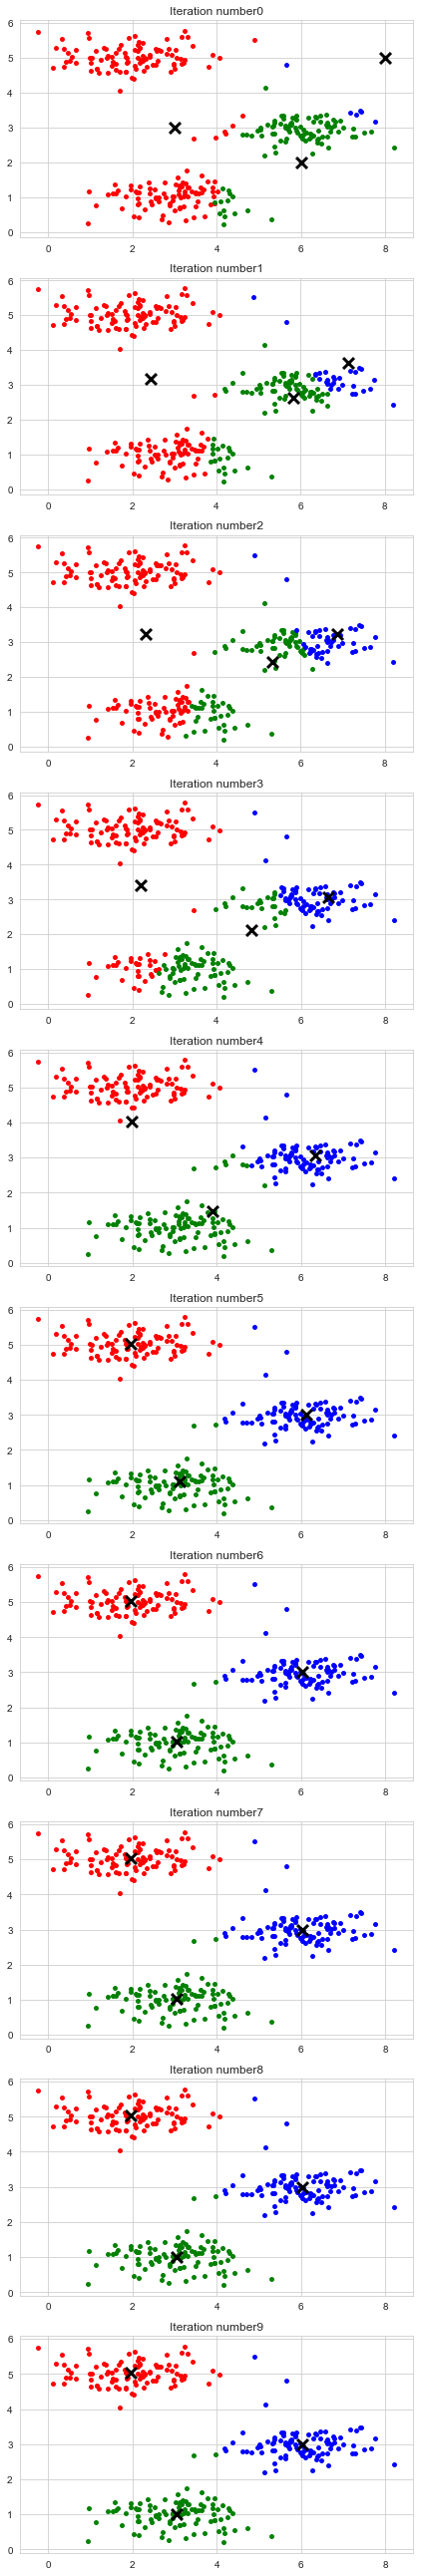

In [112]:
plotKMeans(X,initial_centroid, idx_closest,3,10)

# Part 1.4) K-means clustering on pixels

In [156]:
import imageio
im = imageio.imread('bird_small.png')
im.shape

(128, 128, 3)

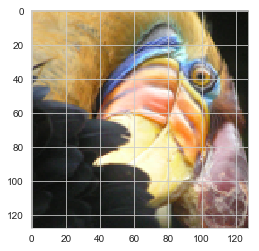

In [157]:
imgplot = plt.imshow(im)
plt.show()

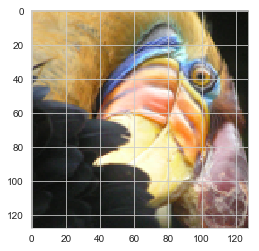

In [158]:
im = im/255
imgplot = plt.imshow(im)
plt.show()

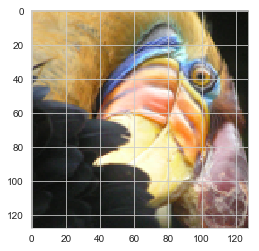

In [272]:
imgplot = plt.imshow(im)
plt.show()

In [161]:
img_size = im.shape
im_reshaped = im.reshape(img_size[0]*img_size[1],3)
im_reshaped.shape

(16384, 3)

In [163]:
def KMeansInitCentroids(X,K):
    #pick K random indices
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,X.shape[1]))
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1)]
    return centroids

In [164]:
K=16
num_iters = 10
initial_centroids = KMeansInitCentroids(im_reshaped,K)

In [165]:
initial_centroids.shape

(16, 3)

In [166]:
def runkMeans(X, initial_centroids, max_iters):
    m,n = X.shape[0], X.shape[1]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    
    for i in range(max_iters):
        
        idx = findClosestCentroid(X=X,centroid=centroids)
        centroids = computeCentroid(K=K,X=X,idx=idx)
    return idx, centroids

    

In [167]:
idx_iter, centroids_iter = runkMeans(im_reshaped,initial_centroids,num_iters)

In [168]:
centroids_iter

array([[0.70075261, 0.60041415, 0.45768105],
       [0.06492804, 0.07074278, 0.06067806],
       [0.25235638, 0.23501083, 0.23398288],
       [0.88121397, 0.7390222 , 0.48655576],
       [0.41700222, 0.32427599, 0.2510329 ],
       [0.12002968, 0.12956863, 0.12039852],
       [0.84586944, 0.59561287, 0.28772896],
       [0.62738266, 0.46029241, 0.21888707],
       [0.67539753, 0.68229803, 0.74652573],
       [0.08355811, 0.09096764, 0.07994899],
       [0.49282305, 0.45067134, 0.46420796],
       [0.05457613, 0.06009193, 0.05051492],
       [0.96171151, 0.90430123, 0.76133283],
       [0.16753748, 0.16859254, 0.16051667],
       [0.07395066, 0.07985946, 0.0694095 ],
       [0.09784779, 0.10497698, 0.0944798 ]])

# Part 1.5) Let's print the new image

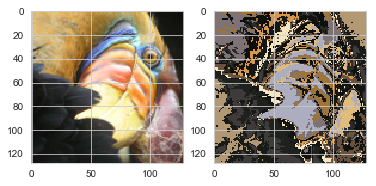

In [169]:
#To do this we will make a copy of the image
#loop through the centroids
#For every position on the image where the index is same as the centroid we are currently looping over, we will change
##the pixel intensity to that centroids intensite

im_reshaped.shape #(16385,3)
im_copy = im_reshaped.copy()
#im_copy = im_copy.reshape(128*128,3)
#centroids_iter = centroids_iter*255

for i in range(1,K+1):
    im_copy[(idx==i)[:,0]] = centroids_iter[i-1]

im_copy = im_copy.reshape(128,128,3)
    

import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(im)
ax[1].imshow(im_copy)




# Part 2.1) Load Example Dataset

In [176]:
data2 = loadmat('ex7data1.mat')
data2.keys()
X2= data2['X']
X2.shape

(50, 2)

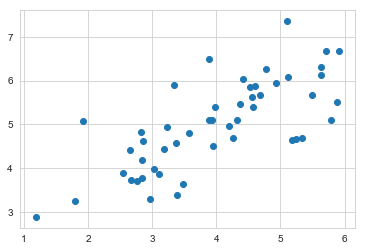

In [177]:
plt.scatter(X2[:,0],X2[:,1])

# Part 2.2) Principal Component Analysis

In [183]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [185]:
X_norm, mu , sigma = featureNormalize(X2)
X_norm.shape

In [202]:
def pca_(X):
    m,n = X.shape[0], X.shape[1]
    U = np.zeros((n,1)) #n is the feature dimention whereas m is the number of samples
    S = np.zeros((n,1)) #n is the feature dimension whereas m is the number of samples
    
    sigma = (1/m)*(np.dot(X.T,X))
    U,S,V = np.linalg.svd(sigma)
    return U,S

In [203]:
U,S = pca_(X_norm)

In [204]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [205]:
S

array([1.73553038, 0.26446962])

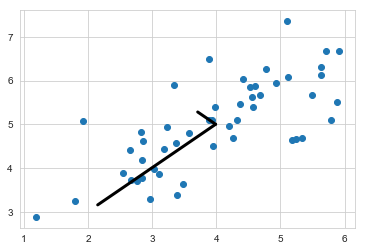

In [235]:
plt.scatter(X2[:,0], X2[:,1])
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3) #first eigenvector
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

# Part 2.3) Project Data and Recover Data

In [210]:
def projectData(X,U,K):
    m = X.shape[0]
    Z = np.zeros((m,K))
    
    for i in range(m):
        #for each data point project it onto the kth eigenvector
        for j in range(K):
            Z[i,j] = X[i] @ U[:,j]
    return Z

In [211]:
K = 1
Z = projectData(X_norm, U, K)

In [213]:
Z.shape

(50, 1)

In [214]:
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

In [251]:
def recoverData(Z,U,K):
    m = Z.shape[0]
    X_rec = np.zeros((Z.shape[0],U.shape[0])) #the number of rows in U will show the initial number of dimensions
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i] = np.dot(Z[i,:],U_reduced.T)
    return X_rec

In [254]:
X_rec = recoverData(Z,U,K)
print("Approximation of the first example:",X_rec[0,:])


Approximation of the first example: [-1.05805279 -1.05805279]


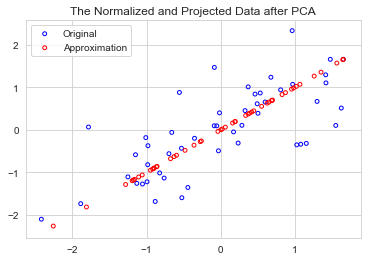

In [255]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

# Part 2.4) Load and Visualize Face Data

In [258]:
face_data = loadmat('ex7faces.mat')
face_data.keys()
X_faces = face_data['X']

In [259]:
X_faces.shape

(5000, 1024)

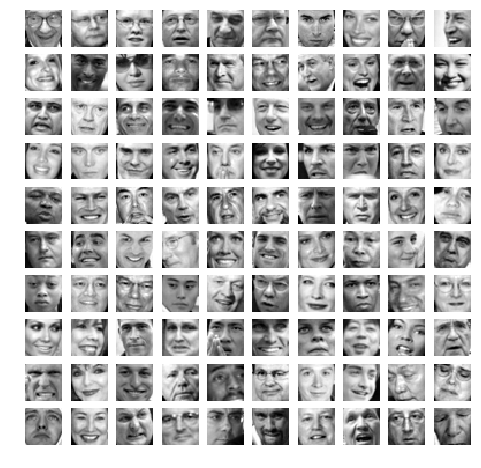

In [279]:
fig,ax = plt.subplots(nrows = 10, ncols=10, figsize = (8,8))
#create a 10 by 10 grid
for i in range(10): #increase i by 10 
    for j in range(10):
        ax[i,j].imshow(X_faces[i*10+j,:].reshape(32,32,order = "F"),cmap="gray")
        ax[i,j].axis("off")


# Part 2.5) PCA on the face data

In [284]:
#Before running PCA, it is important to normalize the data
X_norm_faces, mu_faces, sigma_faces = featureNormalize(X_faces)

#now let's run PCA
U_faces, S_faces = pca_(X_norm_faces)

In [287]:
X_norm_faces.shape

(5000, 1024)

In [288]:
U_faces.shape

(1024, 1024)

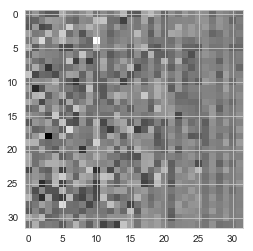

In [291]:
#Now let's visualize one of the eigenvectors
plt.imshow(U_faces[0,:].T.reshape(32,32,order = "F"),cmap="gray")

In [297]:
#Now let's visualize 36 top eigenvectors
U_reduced = U_faces[:,:36].T#each column has one eigenvector

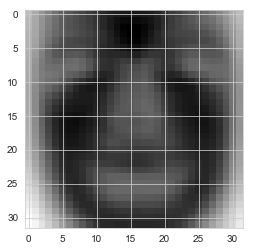

In [299]:
plt.imshow(U_reduced[0,:].reshape(32,32,order = "F"),cmap="gray")


In [301]:
U_faces.shape

(1024, 1024)

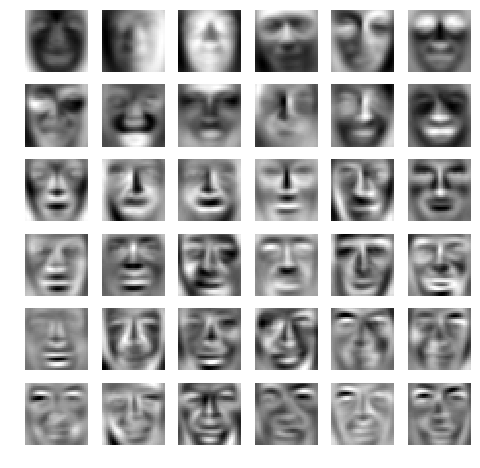

In [304]:
fig, ax = plt.subplots(nrows = 6, ncols = 6, figsize= (8,8))
U_reduced = U_faces[:,:36]#each column has one eigenvector. Let's get 36 columns
for i in range(0,36,6):
    for j in range(6):
        ax[int(i/6),j].imshow(U_reduced[:,i+j].reshape(32,32,order = "F"),cmap="gray")#we want to print column by column on U_reduced
        ax[int(i/6),j].axis("off")

# Part 2.6) Dimension reduction for faces

In [306]:
K=100
Z_faces = projectData(K=K,U=U_faces,X=X_norm_faces)


In [308]:
print("The projected data Z has a size of:",Z_faces.shape)


The projected data Z has a size of: (5000, 100)


# Part 2.7) Visualization of faces after PCA Dimension reduction

In [309]:
X_rec_faces = recoverData(K=K,U=U_faces,Z=Z_faces)

In [310]:
X_rec_faces.shape

(5000, 1024)

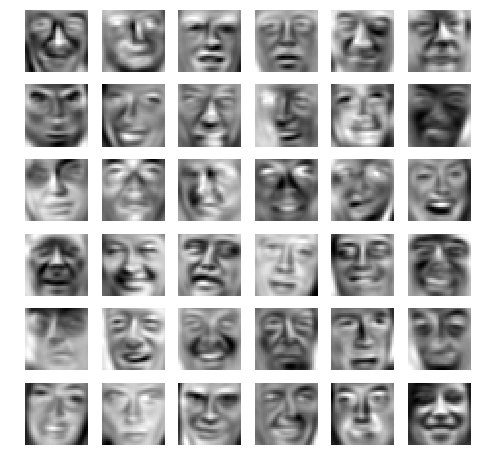

In [312]:
fig, ax = plt.subplots(nrows = 6, ncols = 6, figsize= (8,8))
for i in range(0,36,6):
    for j in range(6):
        ax[int(i/6),j].imshow(X_rec_faces[i+j,:].reshape(32,32,order = "F"),cmap="gray")#we want to print column by column on U_reduced
        ax[int(i/6),j].axis("off")